<a href="https://colab.research.google.com/github/Javiermarinp/learn_python/blob/main/Pandas_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDAS - Primeros pasos

Antes de nada, hay que importar la libreria de panda, y vamos a ver como se pueden leer ficheros, por ejemplo csv.

La función **read_csv** tiene muchos más argumentos que nos permiten hacer múltiples acciones a la hora de leer el archivo.

Por ejemplo podemos indicar el separador de cada línea del fichero con "sep", pero hay muchos otras opciones que podemos consultar en la[ documentación oficial.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [2]:
import pandas as pd

url_fichero = "https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/customers.csv"
customers = pd.read_csv(url_fichero)


#La función head() nos permite mostrar las primeras lineas del archivo
customers.head()

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region
0,JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
1,SW-20245,Scot Wooten,Consumer,United States,Springfield,Ohio,45503,East
2,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
3,ML-18040,Michelle Lonsdale,Corporate,United States,Missouri City,Texas,77489,Central
4,JG-15115,Jack Garza,Consumer,United States,Charlotte,North Carolina,28205,South


# Index

Los DataFrames de Pandas tienen un campo llamado Index, que facilita el acceder a los datos de una manera más fácil. También permite dar un nombre a cada fila, lo que facilita el trabajar con el DataFrame.

In [3]:
#Podemos darle a cada fila el nombre del valor customer_id utilizandolo como index. Al ser un valor único, nos será muy útil.
customers = pd.read_csv(url_fichero, index_col="Customer_ID")
customers.head()

,Customer_Name,Segment,Country,City,State,Postal_Code,Region
Customer_ID,,,,,,,
JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
SW-20245,Scot Wooten,Consumer,United States,Springfield,Ohio,45503,East
SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
ML-18040,Michelle Lonsdale,Corporate,United States,Missouri City,Texas,77489,Central
JG-15115,Jack Garza,Consumer,United States,Charlotte,North Carolina,28205,South


#Leyendo datos de una base de datos
Python, y concretamente Pandas nos permite conectarnos a una base de datos y ejecutar código SQL para recuperar datos y guardarlos en un DataFrame.

Para este ejemplo, utilizaremos la libreria sqlite que creará una pequeña base de datos a la que nos podremos

In [4]:
####################  ESTE TROZO DE CÓDIGO NOS CREARÁ UNA PEQUEÑA BASE DE DATOS PARA UTILIZAR DE EJEMPLO. ####
####################   NO ES NECESARIO QUE LO APRENDAIS, SOLO EJECUTARLO UNA VEZ                          ####
# Importamos SQLite
import sqlite3 
# conectamos a la BD
db_con = sqlite3.connect(r'database.db') 
# Leemos todos los csvs
c = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/customers.csv")
o = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/orders.csv")
r = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/returns.csv")
p = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/products.csv")
# Escribimos los csvs como tablas en la base de datos.
c.to_sql('customers', db_con, if_exists='replace', index=False) 
o.to_sql('orders', db_con, if_exists='replace', index=False) 
r.to_sql('returns', db_con, if_exists='replace', index=False) 
p.to_sql('products', db_con, if_exists='replace', index=False) 

#Cerramos la conexion.
db_con.close()

In [ ]:
#Para conectarse a una base de datos necesitamos primero saber donde se encuentra, y normalmente usuario y contraseña. 
#Pero en esta ocasion nos basta con ejecutar la siguiente línea.
db_con = sqlite3.connect(r'database.db') 

Podemos mezclar tablas con JOIN, para aprovechar y traernos ya los datos mezclados en un mismo dataframe.

In [ ]:
order_and_products = pd.read_sql("SELECT * FROM orders JOIN products ON orders.Product_ID = products.Product_ID", db_con)
order_and_products.head()

# Accediendo y manejando los DataFrames

En esta sección veremos las formas más comunes de tratar con un dataframe. Como accedemos a las diferentes columnas y filas y cómo se utiliza el index.

In [ ]:
#esta funcion nos indica cuantas filas y columnas tiene nuestro dataframe
customers.shape

(793, 8)

In [ ]:
#la funcion len() de python nos devuelve la longitud de objetos, arrays, y tambien de DataFrames
len(customers)

793

In [ ]:
# Podemos recuperar una columna escribiendo dataframe.nombrecolumna
customers.Customer_Name

0            Jack Lebron
1            Scot Wooten
2            Sean Miller
3      Michelle Lonsdale
4             Jack Garza
             ...        
788          Chuck Sachs
789         Janet Martin
790        Mick Crebagga
791     Victoria Pisteka
792        Maria Etezadi
Name: Customer_Name, Length: 793, dtype: object

In [ ]:
customers.City

0          Riverside
1        Springfield
2       Jacksonville
3      Missouri City
4          Charlotte
           ...      
788    New York City
789        Baltimore
790          Chicago
791    San Francisco
792      Springfield
Name: City, Length: 793, dtype: object

In [ ]:
#También podemos hacerlo de de esta forma
customers["Customer_Name"]

0            Jack Lebron
1            Scot Wooten
2            Sean Miller
3      Michelle Lonsdale
4             Jack Garza
             ...        
788          Chuck Sachs
789         Janet Martin
790        Mick Crebagga
791     Victoria Pisteka
792        Maria Etezadi
Name: Customer_Name, Length: 793, dtype: object

# **iloc**
para acceder a filas según su posición

# **Loc**
lo hacemos basándonos en su Nombre/Etiqueta/Index


In [ ]:
#Para acceder a una fila segun su posición en el dataframe utilizaremos iloc
customers.iloc[12:560]

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region
12,KB-16405,Katrina Bavinger,Home Office,United States,New York City,New York,10035,East
13,RH-19495,Rick Hansen,Consumer,United States,Denver,Colorado,80219,West
14,AG-10900,Arthur Gainer,Consumer,United States,Philadelphia,Pennsylvania,19134,East
15,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South
16,RD-19810,Ross DeVincentis,Home Office,United States,Los Angeles,California,90045,West
...,...,...,...,...,...,...,...,...
555,TC-21475,Tony Chapman,Home Office,United States,Danville,Illinois,61832,Central
556,TT-21070,Ted Trevino,Consumer,United States,Chattanooga,Tennessee,37421,South
557,BF-11020,Barry Französisch,Corporate,United States,Jacksonville,Florida,32216,South
558,KB-16315,Karl Braun,Consumer,United States,Newark,Delaware,19711,East


In [ ]:
#Recordar que podemos jugar con : de manera muy cómoda, tanto para seleccionar más de una fila coomo mas de una columna
customers.iloc[-5:]

#Ejecutar estas sentencias para comprobar  los resultados.
#customers.iloc[10:15, 1]
#customers.iloc[10:, 1:5]
#customers.iloc[:, 1:]
#customers.iloc[-5:]

In [ ]:
#Con iloc accedemos a los elementos basandonos en su posición, pero con loc lo hacemos basándonos en su Nombre/Etiqueta/Index
customers.loc[47]  #con esta sentencia conseguimos la fila con nombre 47

In [5]:
#Podemos combinar y crear condiciones tan compllicadas como necesitemos con & (Y) y | (O)
customers.loc[ (customers.Region=="West") & (customers.Segment=="Consumer")]

,Customer_Name,Segment,Country,City,State,Postal_Code,Region
Customer_ID,,,,,,,
JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
BK-11260,Berenike Kampe,Consumer,United States,San Francisco,California,94110,West
RH-19495,Rick Hansen,Consumer,United States,Denver,Colorado,80219,West
RO-19780,Rose O'Brian,Consumer,United States,San Francisco,California,94110,West
CS-12505,Cindy Stewart,Consumer,United States,San Francisco,California,94122,West
...,...,...,...,...,...,...,...
RF-19735,Roland Fjeld,Consumer,United States,San Diego,California,92105,West
RC-19960,Ryan Crowe,Consumer,United States,Springfield,Oregon,97477,West
SC-20305,Sean Christensen,Consumer,United States,Los Angeles,California,90036,West


Existen varias funciones que nos facilitan la vida a la hora de seleccionar filas.



*   isin nos permite especificar más de un valor válido
*   notnull nos permite seleccionar las filas que no tengan valores nulos



In [ ]:
#para seleccionar todas las filas cuyo valor de Segment cumpla uno de estos dos valores
customers.loc[customers.Segment.isin(["Consumer", "Corporate"])]


customers.loc[customers.Segment.isin(["Consumer", "Corporate"])==False] #podemos hacer la inversa añadiendo == False

,Customer_Name,Segment,Country,City,State,Postal_Code,Region
Customer_ID,,,,,,,
SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
PS-18970,Paul Stevenson,Home Office,United States,Chicago,Illinois,60610,Central
KB-16405,Katrina Bavinger,Home Office,United States,New York City,New York,10035,East
RD-19810,Ross DeVincentis,Home Office,United States,Los Angeles,California,90045,West
JK-15640,Jim Kriz,Home Office,United States,Seattle,Washington,98105,West
...,...,...,...,...,...,...,...
HP-14815,Harold Pawlan,Home Office,United States,Concord,New Hampshire,3301,East
SJ-20125,Sanjit Jacobs,Home Office,United States,New Brunswick,New Jersey,8901,East
NL-18310,Nancy Lomonaco,Home Office,United States,Los Angeles,California,90045,West


In [ ]:
#todas las filas cuya region no sea null
customers.loc[customers.Region.notnull()]

,Customer_Name,Segment,Country,City,State,Postal_Code,Region
Customer_ID,,,,,,,
JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
SW-20245,Scot Wooten,Consumer,United States,Springfield,Ohio,45503,East
SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
ML-18040,Michelle Lonsdale,Corporate,United States,Missouri City,Texas,77489,Central
JG-15115,Jack Garza,Consumer,United States,Charlotte,North Carolina,28205,South
...,...,...,...,...,...,...,...
CS-12460,Chuck Sachs,Consumer,United States,New York City,New York,10009,East
JM-15250,Janet Martin,Consumer,United States,Baltimore,Maryland,21215,East
MC-18100,Mick Crebagga,Consumer,United States,Chicago,Illinois,60623,Central


In [ ]:
import pandas as pd

orders = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/orders.csv")

## Renombrar
Para renombrar columnas utilizaremos la función rename().

Por ejemplo, si queremos renombrar la columna Order_Date lo haremos de la siguiente forma.

In [ ]:
orders = orders.rename(columns={"Order_Date": "Date"})
orders.head()

,Customer_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Product_ID,Quantity
0,MG-17875,CA-2014-103744,2014-02-23,2014-02-27,Standard Class,OFF-LA-10004425,3
1,MG-17875,CA-2014-103744,2014-02-23,2014-02-27,Standard Class,OFF-BI-10000320,3
2,DE-13255,CA-2014-109134,2014-11-05,2014-11-10,Standard Class,FUR-FU-10000320,6
3,MD-17350,CA-2014-114251,2014-11-05,2014-11-10,Standard Class,FUR-FU-10001468,2
4,MD-17350,CA-2014-114251,2014-11-05,2014-11-10,Standard Class,OFF-BI-10003684,2


## Combinar DataFrames

En ocasiones tenemos diferentes archivos o DataFrames que contienen información con los mismos campos o columnas. Imaginemos que tenemos archivos de años diferentes y queremos agruparlos en uno para trabajar con todos los años en el mismo DataFrame.

Utilizaremos la funcion concat()



In [ ]:
dataframe1 = orders[0:1000]
dataframe2 = orders[1000:2000]

dataframe3 = pd.concat([dataframe1, dataframe2]) #mirad que a la funcion concat le pasamos un array de dataframes. Pueden ser más de 2!!
dataframe3

,Customer_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Product_ID,Quantity
0,MG-17875,CA-2014-103744,2014-02-23,2014-02-27,Standard Class,OFF-LA-10004425,3
1,MG-17875,CA-2014-103744,2014-02-23,2014-02-27,Standard Class,OFF-BI-10000320,3
2,DE-13255,CA-2014-109134,2014-11-05,2014-11-10,Standard Class,FUR-FU-10000320,6
3,MD-17350,CA-2014-114251,2014-11-05,2014-11-10,Standard Class,FUR-FU-10001468,2
4,MD-17350,CA-2014-114251,2014-11-05,2014-11-10,Standard Class,OFF-BI-10003684,2
...,...,...,...,...,...,...,...
1995,MM-17920,CA-2017-164329,2017-01-30,2017-01-30,Same Day,OFF-ST-10001511,2
1996,DC-13285,CA-2017-104003,2017-10-07,2017-10-13,Standard Class,FUR-BO-10003965,2
1997,JK-15370,US-2014-102715,2014-04-11,2014-04-13,Second Class,TEC-AC-10001874,7
1998,JK-15370,US-2014-102715,2014-04-11,2014-04-13,Second Class,OFF-PA-10000029,2


In [ ]:
orders = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/orders.csv")
products = orders = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/products.csv")


orders.join(products.set_index("Product_ID"), on="Product_ID", lsuffix="_o", rsuffix="_p")

,Product_ID,Category_o,Sub_Category_o,Product_Name_o,Price_o,Category_p,Sub_Category_p,Product_Name_p,Price_p
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0
...,...,...,...,...,...,...,...,...,...
1889,OFF-EN-10001990,Office Supplies,Envelopes,Staple envelope,501.0,Office Supplies,Envelopes,Staple envelope,501.0
1890,OFF-EN-10002621,Office Supplies,Envelopes,Staple envelope,782.0,Office Supplies,Envelopes,Staple envelope,782.0
1891,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,524.0,Office Supplies,Envelopes,Staple envelope,524.0
1892,OFF-EN-10003286,Office Supplies,Envelopes,Staple envelope,482.0,Office Supplies,Envelopes,Staple envelope,482.0


# Escribiendo ficheros

Escribir un fichero CSV es casi tan fácil como leerlo, utilizando la funcion to_csv() [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)


In [ ]:
products = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/products.csv")

products.to_csv("productos.csv")

## Map()
Utilizaremos la función map cuando queremos aplicar una funcion a todos los elementos de una columna.  

La función [Map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) toma como argumento otra función, que contiene el código que queremos aplicar a cada elemento de la lista o columna.

In [ ]:
products = orders = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/products.csv")

def extrae_codigo(x):
  return x[0:3]

products["Codigo_Categoría"] = products["Product_ID"].map(extrae_codigo)

products.head()

,Product_ID,Category,Sub_Category,Product_Name,Price,Codigo_Categoría
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0,FUR
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0,FUR
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0,FUR
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0,FUR
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0,FUR


## Apply()
La función Apply funciona de forma muy parecida a la funcion Map. Necesita una función que aplicará a todos los elementos, pero puede aplicarse tanto a una columna entera como a parte o todo el DataFrame.

Por ejemplo, igual que el el caso anterior podemos crear una nueva columna que extraiga el código de subcategoría del Product_ID.**bold text**

In [ ]:
df = pd.DataFrame({ 'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])

Podemos aplicar la función sum a todas las columnas o filas del dataframe. Por defecto, lo aplica sobre todas las columnas del dataframe y nos devuelve la suma para cada una de ellas.

In [ ]:
df.apply(sum)

A     10
B    100
C    200
dtype: int64

Pero con el parameto axis=1 podemos cambiarlo para que lo aplique sobre cada fila en lugar de sobre cada columna.

In [ ]:
df.apply(sum, axis=1)

Row 1     31
Row 2     62
Row 3     93
Row 4    124
dtype: int64

#GroupBy y Agregaciones

Igual que en SQL, podemos agrupar el dataframe con la funcion GroupBy, de tal forma que las funciones posteriores se apliquen a cada grupo por separado.

Por ejemplo, si queremos contar valores de una columna en concreto.


En pandas hay que eliminar la agrupación al finalizar, si no el dataframe se mantiene agrupadoy nos dificulta su lectura y manejo. Para ello llamamos a la funcion reset_index()


In [ ]:
#vamos a empezar con la tabla de products limpia de nuevo
products = pd.read_csv("https://raw.githubusercontent.com/alexsnsk/alejandrocastillothevalley/main/products.csv")


products.groupby(by="Category")["Product_ID"].nunique()



Category
Furniture           375
Office Supplies    1083
Technology          404
Name: Product_ID, dtype: int64

O sumar una columna agrupando por Cateoria y SubCategoria

In [ ]:
products.groupby(by=["Category", "Sub_Category"])["Price"].sum()

Category         Sub_Category
Furniture        Bookcases        29312.0
                 Chairs           43189.0
                 Furnishings      95106.0
                 Tables           27744.0
Office Supplies  Appliances       53338.0
                 Art              90172.0
                 Binders         101781.0
                 Envelopes        22793.0
                 Fasteners        19094.0
                 Labels           35505.0
                 Paper           136658.0
                 Storage          65629.0
                 Supplies         19864.0
Technology       Accessories      72253.0
                 Copiers           4802.0
                 Machines         32637.0
                 Phones           96387.0
Name: Price, dtype: float64

Con la función **agg** podemos hacer multiples agregaciones sobre una misma columna a un dataset agrupado, o incluso variar la agregación seleccionada en función de la columna.

Una lista de funciones es la siguiente

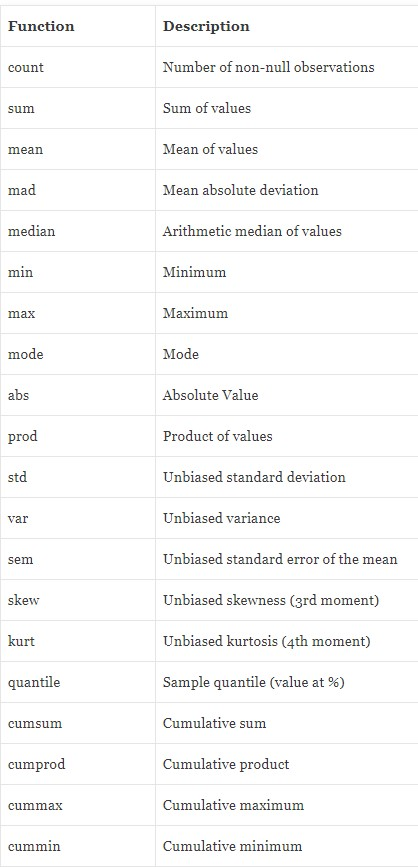



Por ejemplo, para agrupar por categoría y subcategoría y calcular el máximo de cada columna

In [ ]:
products.groupby(["Category", "Sub_Category"]).agg(["max"])

Product_ID  ...   Price
                                          max  ...     max
Category        Sub_Category                   ...        
Furniture       Bookcases     FUR-BO-10004834  ...   944.0
                Chairs        FUR-CH-10004997  ...   992.0
                Furnishings   FUR-FU-10004973  ...   999.0
                Tables        FUR-TA-10004915  ...   975.0
Office Supplies Appliances    OFF-AP-10004980  ...   997.0
                Art           OFF-AR-10004999  ...   989.0
                Binders       OFF-BI-10004995  ...   996.0
                Envelopes     OFF-EN-10004955  ...   990.0
                Fasteners     OFF-FA-10004968  ...   908.0
                Labels        OFF-LA-10004853  ...   986.0
                Paper         OFF-PA-10004996  ...   997.0
                Storage       OFF-ST-10004963  ...   999.0
                Supplies      OFF-SU-10004884  ...   951.0
Technology      Accessories   TEC-AC-10004992  ...  1000.0
                Copiers       TEC-CO-10004722  ...   839.0
                Machines      TEC-MA-10004679  ...   986.0
                Phones        TEC-PH-10004977  ...   992.0

[17 rows x 3 columns]

Observar como ha agrupado el índice de Categoría y Subcategoría. A esto se le llama indice jerárquico. Resulta más cómodo de leer, queda más bonito, y mejora el performance cuando estamos tratando con muchos (MUCHOS) datos. 

Pero en ocasiones, si queremos utilizar este resultado en siguientes pasos, nos dificulta. Para evitar este funcionamiento tenemos dos opciones. Utilizar la funcion reset_index() después de calcular, o utilizar el argumento as_index=False en groupby().

In [ ]:
products.groupby(["Category", "Sub_Category"] ).agg(["max"]).reset_index()

,Category,Sub_Category,Product_ID,Product_Name,Price
,,,max,max,max
0,Furniture,Bookcases,FUR-BO-10004834,"Sauder Mission Library with Doors, Fruitwood F...",944.0
1,Furniture,Chairs,FUR-CH-10004997,"Situations Contoured Folding Chairs, 4/Set",992.0
2,Furniture,Furnishings,FUR-FU-10004973,Westinghouse Mesh Shade Clip-On Gooseneck Lamp...,999.0
3,Furniture,Tables,FUR-TA-10004915,Safco Drafting Table,975.0
4,Office Supplies,Appliances,OFF-AP-10004980,Tripp Lite TLP810NET Broadband Surge for Modem...,997.0
5,Office Supplies,Art,OFF-AR-10004999,Zebra Zazzle Fluorescent Highlighters,989.0
6,Office Supplies,Binders,OFF-BI-10004995,Zipper Ring Binder Pockets,996.0
7,Office Supplies,Envelopes,OFF-EN-10004955,"White Envelopes, White Envelopes with Clear Po...",990.0
8,Office Supplies,Fasteners,OFF-FA-10004968,Vinyl Coated Wire Paper Clips in Organizer Box...,908.0


Pero lo normal es que queramos, por ejemplo, calcular la media de una columna, y el conteo de valores diferentes de otra.
Para ello tenemos forma de indicar qué columnas queremos agregar y qué hacer con cada una de ellas.

In [ ]:
products.groupby(["Category", "Sub_Category"]).agg({"Price": "mean", "Product_ID": "nunique"})

Price  Product_ID
Category        Sub_Category                        
Furniture       Bookcases     586.240000          49
                Chairs        490.784091          87
                Furnishings   505.882979         182
                Tables        486.736842          57
Office Supplies Appliances    538.767677          98
                Art           549.829268         163
                Binders       477.845070         210
                Envelopes     422.092593          54
                Fasteners     444.046512          43
                Labels        507.214286          70
                Paper         481.190141         276
                Storage       493.451128         131
                Supplies      522.736842          38
Technology      Accessories   491.517007         144
                Copiers       369.384615          13
                Machines      509.953125          63
                Phones        509.984127         184